Nama : Ardi Nursahwal<br>
NIM : 211351022<br>
Kelas : Malam B

# import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardinursahwal","key":"e52ab3c107e001f242909963b84f93f1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 23.8MB/s]


In [ ]:
!unzip travel-insurance-prediction-data.zip -d travel-insurance-prediction-data
!ls travel-insurance-prediction-data

Archive:  travel-insurance-prediction-data.zip
  inflating: travel-insurance-prediction-data/TravelInsurancePrediction.csv  
TravelInsurancePrediction.csv


# import library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn import metrics


import pickle
import warnings
warnings.simplefilter("ignore")

# Data Discovery

Pertama kita buat dataframe dari dataset yang telah kita download diatas

In [ ]:
df = pd.read_csv('/content/travel-insurance-prediction-data/TravelInsurancePrediction.csv')

Cek 5 data teratas pada dataset, sepertinya kolom Unnamed tidak diperlukan tetapi abaikan dulu untuk sekarang



In [ ]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Dataset yang kita gunakan memiliki baris yang cukup banyak yaitu 1987 baris data

In [ ]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df.shape

(1987, 10)

Mari kita lihat tipe data pada masing-masing kolom, hmm disini kita memiliki total 4 kolom data object kita akan memperbaikinya pada bagian preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Cek data null pada tiap kolom, dan mantap tidak ada data yang null



In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

# EDA (minimal 5)

Pertama kita lihat korelasi antar kolom pada data kita

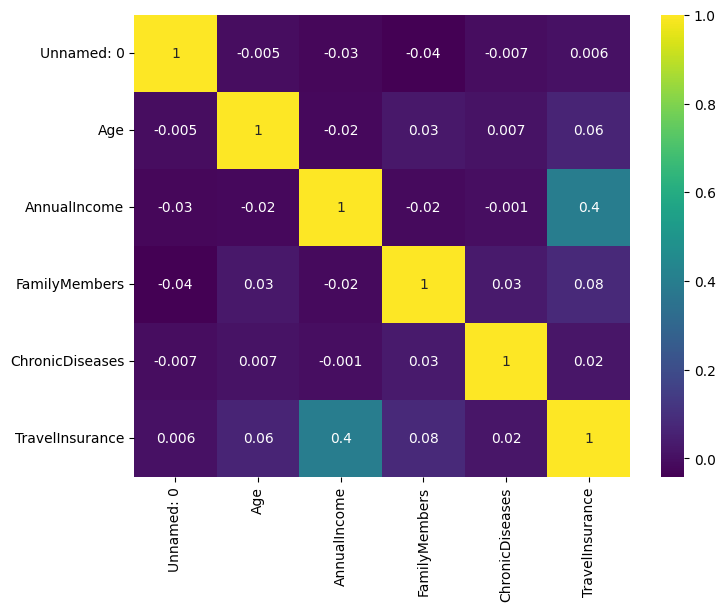

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

Menampilkan distribusi pendapatan tahunan dan rata-rata pada judul plot

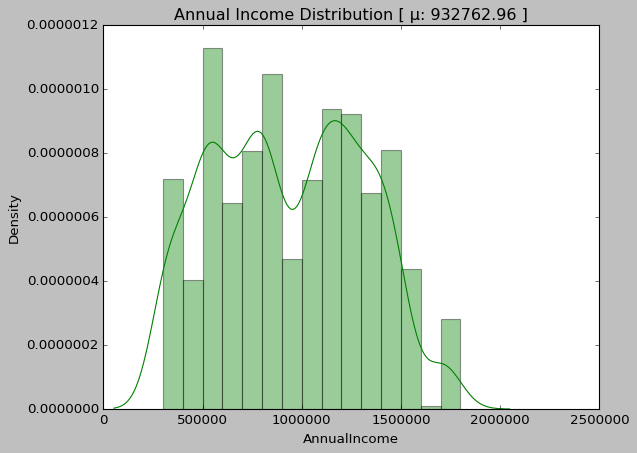

In [ ]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["AnnualIncome"], color="g")
plt.title(f"Annual Income Distribution [ \u03BC: {df['AnnualIncome'].mean():.2f} ]")
plt.show()

Dapat kita lihat sebagian besar anggota keluarga 4 dengan jumlah terendah 8 dan 9.

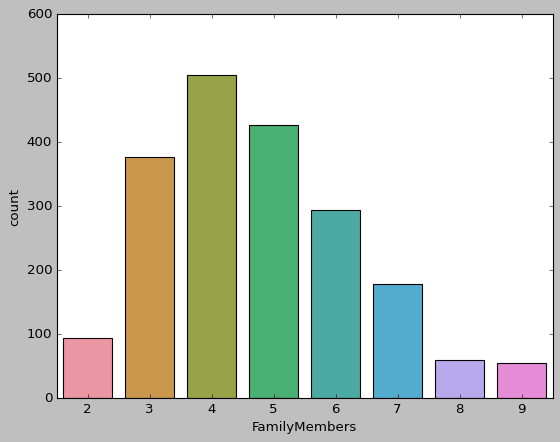

In [ ]:
sns.countplot(x='FamilyMembers',data=df)
plt.show()

Umur 28 paling banyak dan 35 paling rendah tetapi 34 paling banyak kedua setelah 28

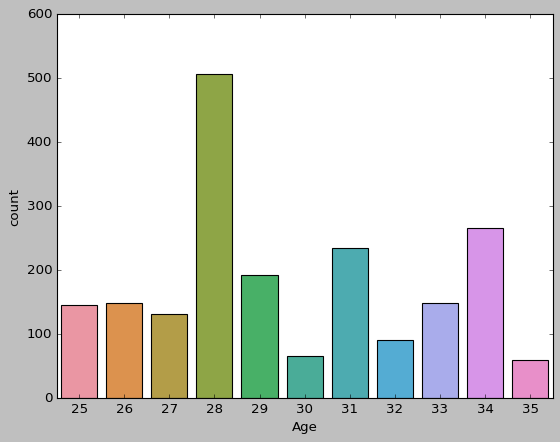

In [ ]:
sns.countplot(x='Age',data=df)
plt.show()


Menampilkan pelanggan yang pernah melakukan perjalanan ke luar negeri dan tidak, sebanyak 72,2% tidak pernah melakukan perjalanan ke luar negeri

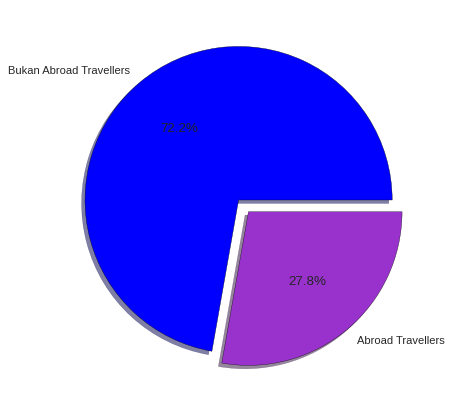

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["ChronicDiseases"].value_counts(),
        colors=["blue","darkorchid"],
        labels=["Bukan Abroad Travellers","Abroad Travellers"],
        shadow = True,
        explode = (0, 0.1),
        autopct='%1.1f%%'
        )
plt.show()

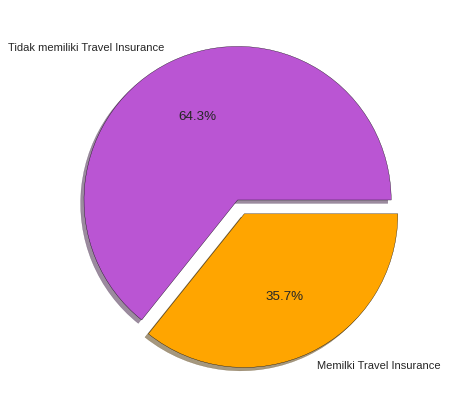

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["TravelInsurance"].value_counts(),
        colors=["mediumorchid","orange"],
        labels=["Tidak memiliki Travel Insurance","Memilki Travel Insurance"],
        shadow = True,
        explode = (0, 0.1),
        autopct='%1.1f%%'
        )
plt.show()

# Preprocessing

Mari kita hapus kolom yang tidak diperlukan

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

Ubah data object menjadi numerikal

In [ ]:
  df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
  df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
  df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

  # Government Sector : 1, Private Sector/Self Employed : 0
  df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

Mari kita lihat hasilnya dan ya semua data sudah menjadi numerikal

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


# modeling

Tentu tahap pertama modeling yang akan kita lakukan adalah membuat variable label dan feature

In [ ]:
x = df.drop(['TravelInsurance'],axis=True)
y = df['TravelInsurance']

Lalu split data menjadi dua subset yaitu untuk training 80% dan testing 20%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

Normalisasi data feature

In [ ]:
mscale=MinMaxScaler()
mscale.fit_transform(x_train)
mscale.transform(x_test)

array([[0. , 0. , 0. , ..., 1. , 1. , 0. ],
       [0.1, 0. , 1. , ..., 1. , 0. , 1. ],
       [0.4, 0. , 1. , ..., 0. , 1. , 0. ],
       ...,
       [0.7, 1. , 1. , ..., 0. , 1. , 0. ],
       [0.3, 1. , 1. , ..., 0. , 0. , 0. ],
       [0.3, 1. , 1. , ..., 1. , 0. , 0. ]])

Dapat kita lihat perbedaan akurasi antara test dan train memiliki perbedaan yang cukup signifikan, ini bisa menjadi indikasi overfitting pada model

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)

train_acc = model.score(x_train,y_train)
test_acc = model.score(x_test,y_test)
print('Training acc:',train_acc,'Test acc:',test_acc)

Training acc: 0.920075519194462 Test acc: 0.7713567839195979


Dan kita akan coba model prediksi sebelum melakukan pruning

In [ ]:
# data = np.array([[31,0,1,400000,6,1,0,0]]) # 0

data = np.array([[26,1,1,1400000,5,0,1,1]]) # 1

prediction = model.predict(data)
prediction[0]

1

# Visualisasi hasil algoritma

Dapat kita lihat D-Tree kita overfitting maka dari itu kita akan melakukan pendekatan pruning

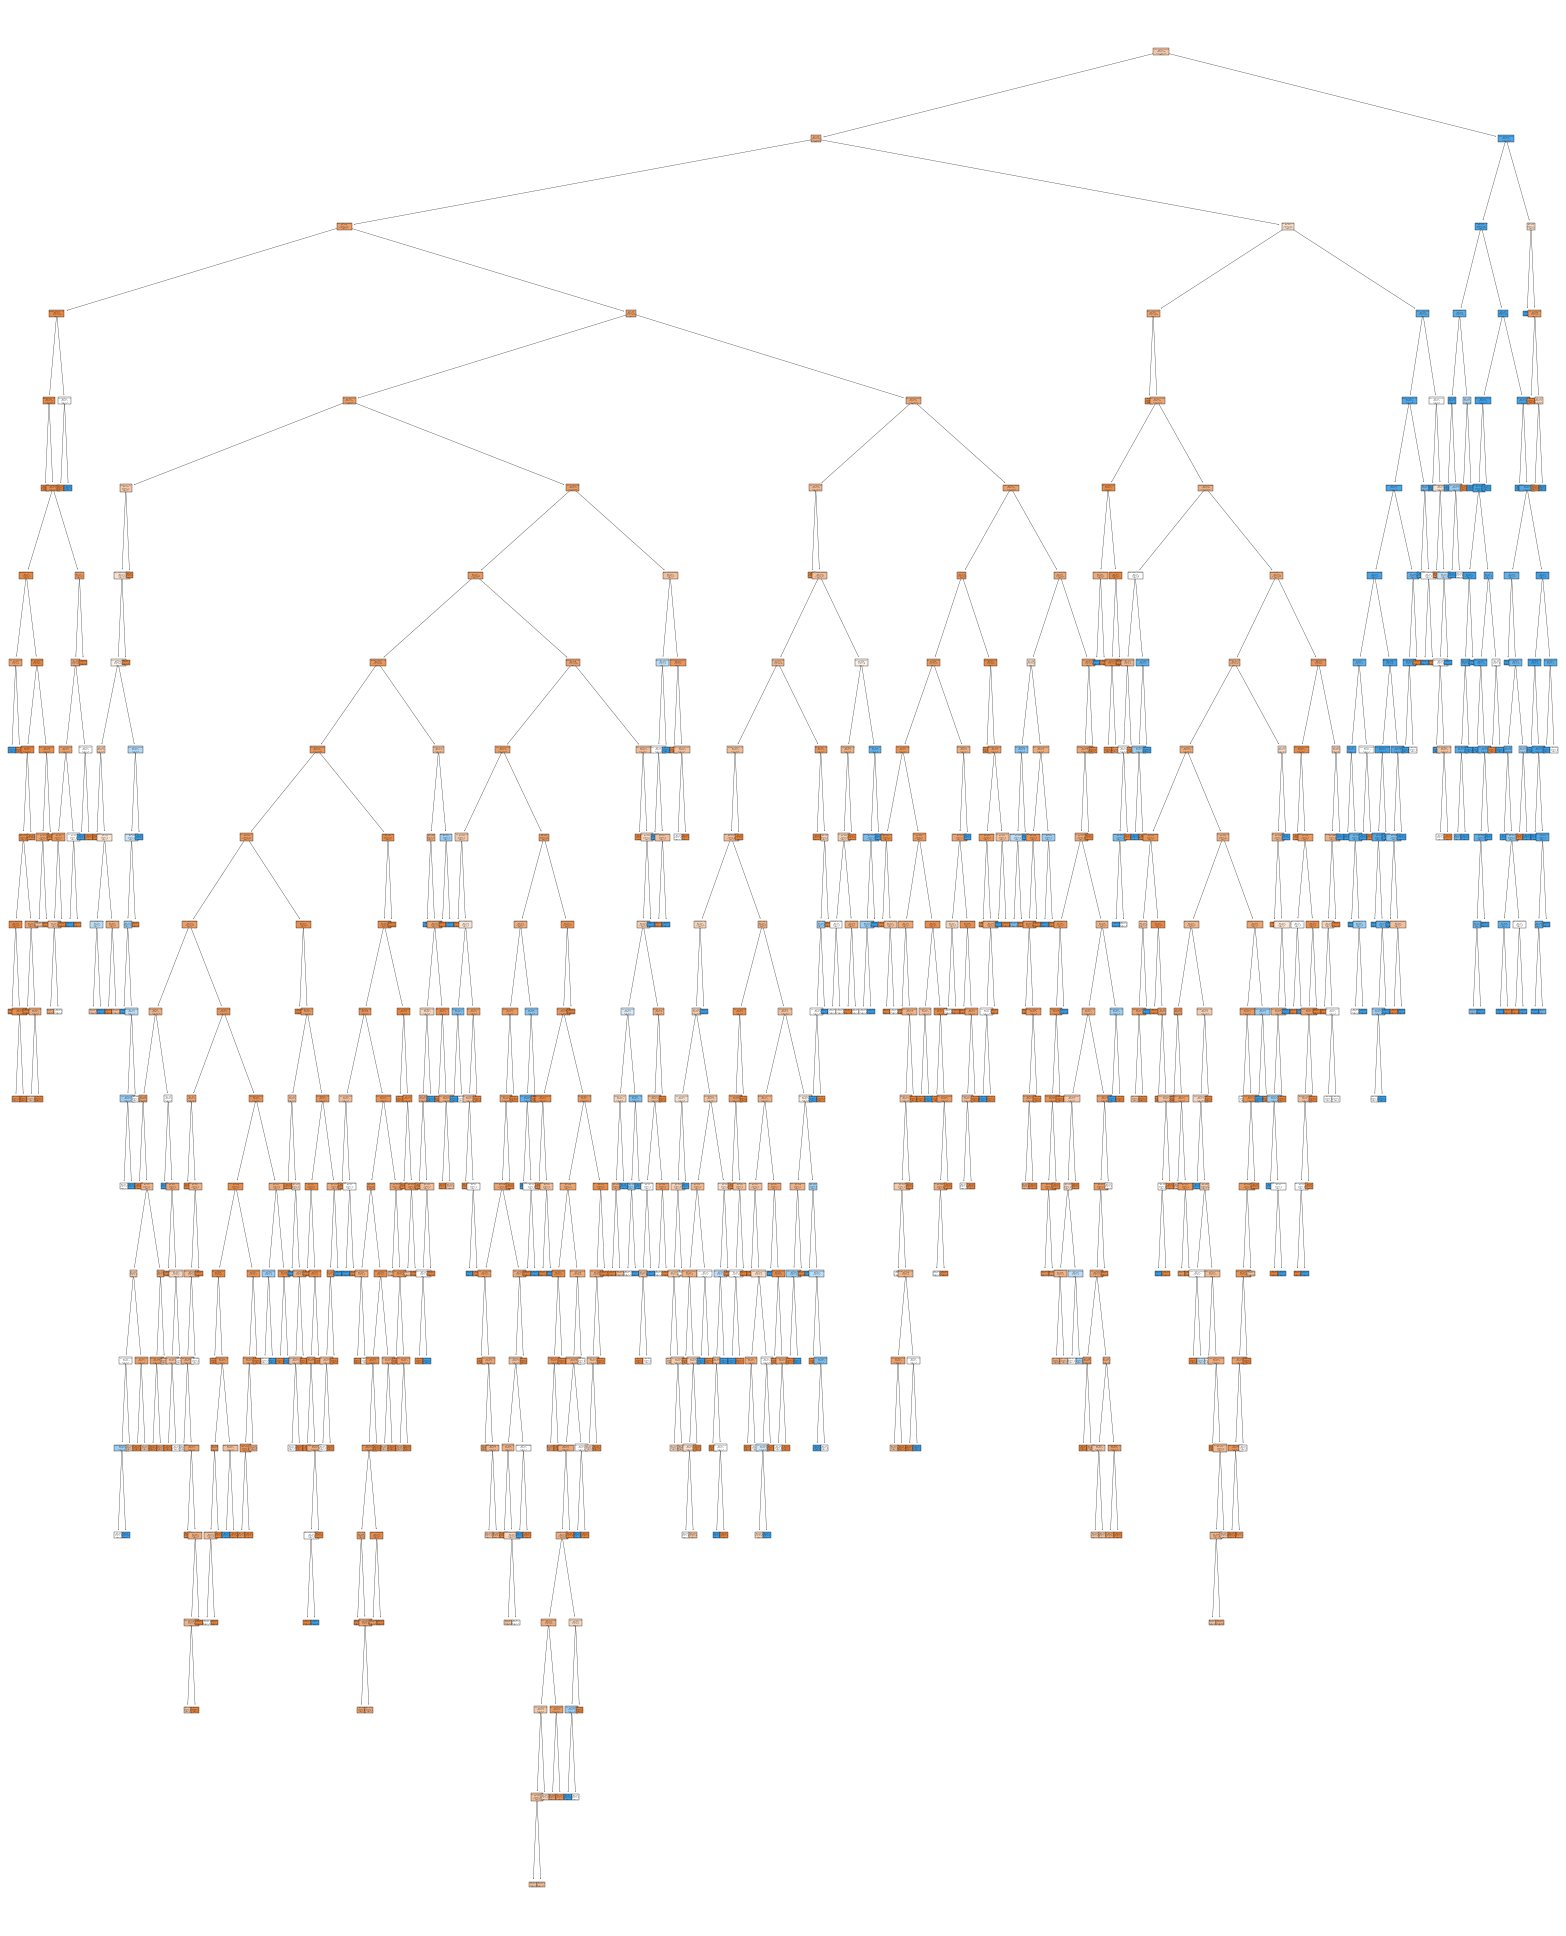

In [ ]:
ind_col = [col for col in df.columns if col != 'TravelInsurance']
dep_col = 'TravelInsurance'

fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=dep_col,
                   filled=True)

### Pre pruning

In [ ]:
params = {'max_depth': [2,4,6,8,10,12,14,16],
'min_samples_split': [2,3,4,5,6],
'min_samples_leaf': [1,2,3]}
clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6]})

Dan perbedaan sudah tidak terlalu signifikan hanya sekitar 2%

In [ ]:
model_prun = gcv.best_estimator_
model_prun.fit(x_train,y_train)

y_train_pred = model_prun.predict(x_train)
y_test_pred = model_prun.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8382630585273757
Test score 0.8190954773869347


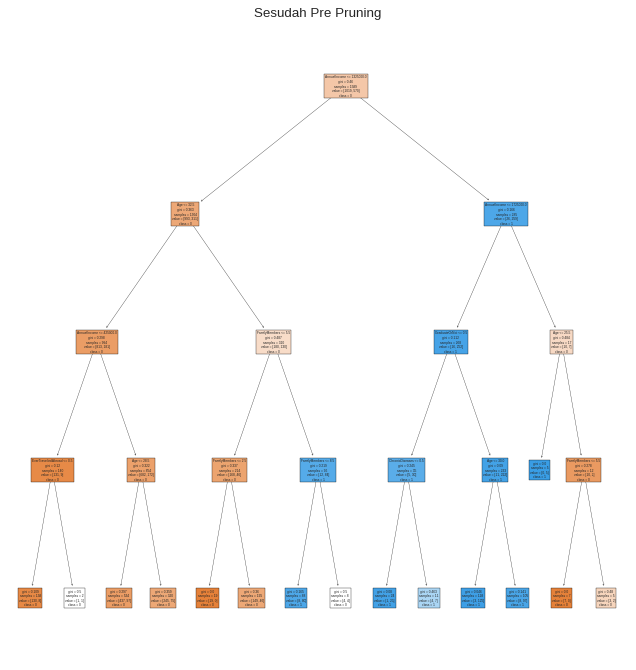

In [ ]:
plt.figure(figsize=(10,10))
features = x.columns
classes = ['0','1']
tree.plot_tree(model_prun,feature_names=features,class_names=classes,filled=True)
plt.title('Sesudah Pre Pruning')
plt.show()

### Post pruning

In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Angka node dalam pohon terakhir adalah: {} dengan ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Angka node dalam pohon terakhir adalah: 1 dengan ccp_alpha: 0.13225457121606976


In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.013)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.013, random_state=0)

Dapat kita lihat perbedaan akurasinya sekarang hanya sekitar 1%


In [ ]:
pred = clf.predict(x_test)
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", accuracy_score(y_test,pred))

Training Accuracy : 0.8332284455632474
Testing Accuracy : 0.8241206030150754


Berdasarkan decision tree di bawah, dapat disimpulkan bahwa Annual Income adalah variabel yang paling berpengaruh. Semakin tinggi Annual Income, maka semakin besar kemungkinan memiliki travel insurance.

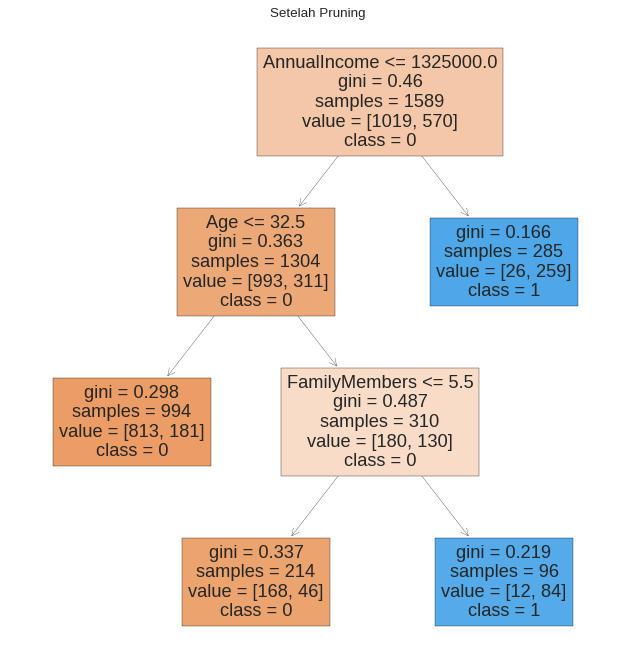

In [ ]:
plt.figure(figsize=(10,10))
features = x.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.title('Setelah Pruning')
plt.show()

In [ ]:
# data = np.array([[31,0,1,400000,6,1,0,0]]) # 0
data = np.array([[26,1,1,1400000,5,0,1,1]]) # 1
prediction = clf.predict(data)
prediction[0]

1

# save model (pickle)

In [ ]:
filename = 'model.sav'
pickle.dump(model_prun, open(filename, 'wb'))

# Matrix model evaluasi

Model sebelum pruning

Text(0.5, 20.666666666666657, 'Predicted label')

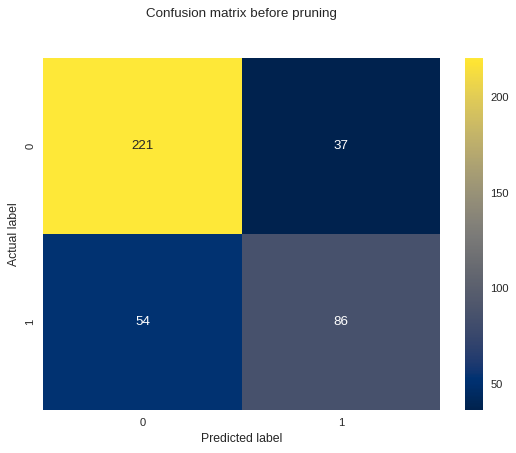

In [ ]:
y_pred = model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.title('Confusion matrix before pruning', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Model pre prunning

Text(0.5, 20.666666666666657, 'Predicted label')

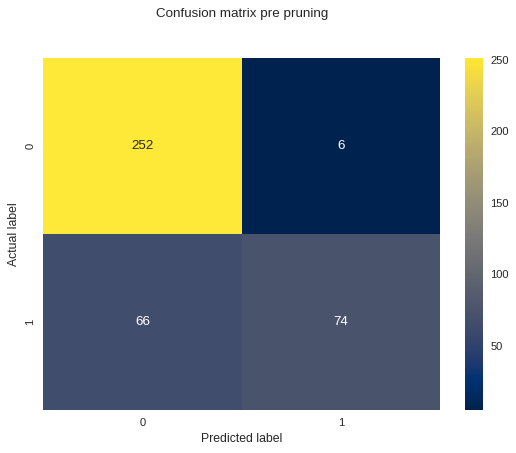

In [ ]:
y_pred = model_prun.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.title('Confusion matrix pre pruning', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Model post pruning

Text(0.5, 20.666666666666657, 'Predicted label')

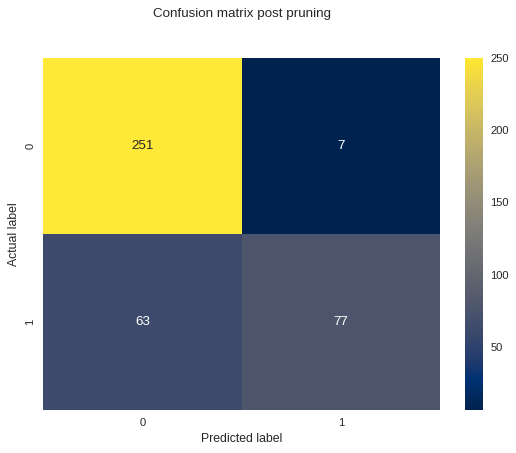

In [ ]:
y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.title('Confusion matrix post pruning', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')